In [46]:
from pathlib import Path
import numpy as np 
import pandas as pd

In [47]:
!tree ~/Projects/BitSize_ML/

3500.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/Users/nejat/Projects/BitSize_ML/
└── end_to_end_ml
    ├── data
    │   └── housing.csv
    ├── images
    │   └── ENV checking.png
    ├── models
    └── notebooks
        ├── 1_setup.ipynb
        ├── 2_fetch_data.ipynb
        ├── 3_overview_EDA.ipynb
        ├── 4_data_split.ipynb
        └── 5_stratified_split.ipynb

6 directories, 7 files


In [48]:
df_path = Path.cwd().parent /"data"/"housing.csv"
df = pd.read_csv(df_path)

In [49]:
from sklearn.model_selection import train_test_split
train_sk, test_sk = train_test_split(df, test_size=0.2, random_state=27)
print(f"[SK], train_size={len(train_sk)}, test_size={len(test_sk)}")

[SK], train_size=16512, test_size=4128


In [50]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: >

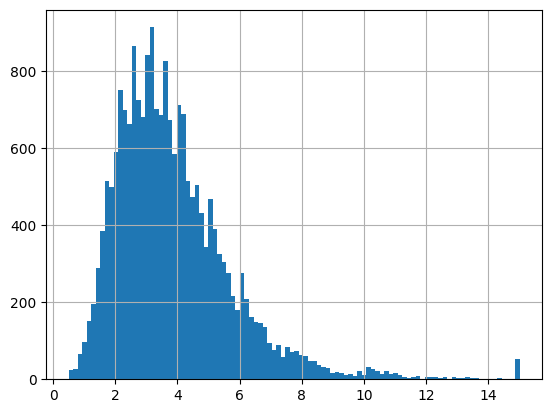

In [51]:
df['median_income'].hist(bins=100)

In [52]:
def create_income_bins(df):
    df = df.copy()
    df['income_cat'] = pd.cut(df['median_income'],
                              bins=[0,1.5,3, 4.5,6,np.inf],
                              labels=[1,2,3,4,5])
    return df
    

<Axes: >

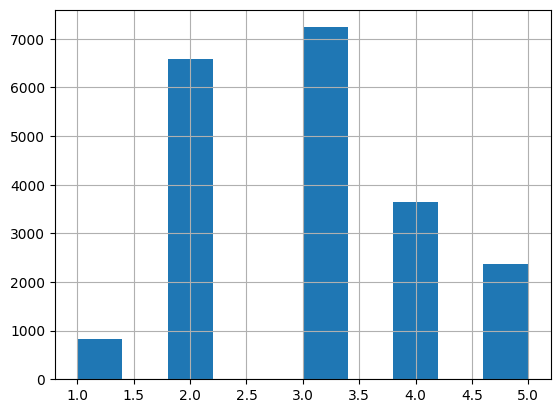

In [53]:
df_binned = create_income_bins(df)
df_binned['income_cat'].hist(bins=10)

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_idx, test_idx in split.split(df_binned,df_binned['income_cat']):
    train_strat = df_binned.loc[train_idx].drop(columns=['income_cat'])
    test_strat = df_binned.loc[test_idx].drop(columns=['income_cat'])
print(f"[Stratified], train_size={len(train_strat)}, test_size={len(test_strat)}")

[Stratified], train_size=16512, test_size=4128


In [58]:
def check_proportions(full, train, test):
    return (
        pd.DataFrame({n:d['income_cat'].value_counts(normalize=True).sort_index()
                      for n,d in {"full":full, "train":train, "test":test}.items()})
                      .round(3).style.background_gradient()
    )

In [60]:
#df_binned
train_binned = create_income_bins(train_strat)
test_binned = create_income_bins(test_strat)

In [61]:
table = check_proportions(df_binned, train_binned, test_binned)
table

,full,train,test
income_cat,,,
1,0.040000,0.040000,0.040000
2,0.319000,0.319000,0.319000
3,0.351000,0.351000,0.351000
4,0.176000,0.176000,0.176000
5,0.114000,0.114000,0.114000
